# Lab-Assignment [OTUODUNG ENOBONG PAUL] MA661E - VT2021

In [1]:
# Libraries

import numpy as np # For linear Algebra
import pandas as pd # Used to work with dataframes
import matplotlib.pyplot as plt # Used to create different statistical plots
import seaborn as sns # makes plot look less generic and a bit styled
sns.set()

from sklearn.cluster import KMeans # Used to create cluster analysis
from sklearn.preprocessing import StandardScaler # Standardizing the data for PCA
from sklearn.decomposition import PCA # Used for conducting the PCA
from sklearn.preprocessing import LabelEncoder

## 1. Data Preparation 

This dataset is the Longitudinal MRI Study in MRI and Alzheimers Dataset on Kaggle. This set consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.

### 1.1. Reading Data from Files

#### 1.1.1. Explaining Column Names

|S/N | Column | Description |Data Type|
|---:|:-------------|:-----------|:----------|
1| Subject ID  | Scan Subject identification - used to reference each MRI test subject |numerical|
2| MRI ID      | MRI Exam Identification - Reference used for each MRI test/scan carried out for each subject|numerical|
3| Group       | Class (Demented or Nondemented) - Characterized each subject as either being demented or nondemented|Categorical|
4|Visit       | Visit Order - Order in which visit was made, either first, second, third, fourth or fifth visit|Categorical|
5|MR Delay| MR Delay Time (Contrast)|numerical|
6|M/F| Gender (Male M/Female F)|Categorical|
7|Hand| Dominant Hand, the data consist of only individuals with their dominant hand being the right|Categorical|
8|Age| Age in Years|numerical|
9|EDUC| Years of Education|numerical|
10|SES| Socioeconomic Status|Categorical|
11|MMSE| Mini Mental State Examination|numerical|
12|CDR| Clinical Dementia Rating|Categorical|
13|eTIV| Estimated Total Intracranial Volume|numerical|
14|nWBV| Normalize Whole Brain Volume|numerical
15|ASF| Atlas Scaling Factor|numerical|


### 1.2. Manipulating Data

#### 1.2.1. Finding and handling missing values

In [3]:
data_long.isnull().sum() # shows the sum of the missing values in the data

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

The missing values(19) in the Social Economic Status is as a result of some subjects having it not filled in their first visit and it is subsequently missing in the following visits. this was noticed when examining the data in excel

Dropping visits made after the first visit would show a true representation of the missing value of the dataset considering the dataset was collected over a few visits for some patients.

In [4]:
data_long_fv = data_long.loc[data_long['Visit']==1] # since we want to only look at the first visit
data_long_fv = data_long_fv.reset_index(drop=True) # We need to reset the index after filteing the visit data by first visit

data_long_fv.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [5]:
data_long_fv['SES'] = data_long_fv['SES'].fillna(data_long_fv['SES'].value_counts().index[0]) # this fills missing value with the modal class

data_long_fv.isna().sum() #to check if there are still missing value

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

This method handles missing values without losing any data when using the filtered data.

Since i used the modal class to fill the missing values for the data with only first visit, i can also use the same method to fill missing values for the original data, because the missing values are repeated due to each subject having different number of visit in which the Value was already missing from the initial visit.

The missing value(2) in the MMSE data is caused by it not being filled in subsequent scans for one subject, which is noticed when the data is filtered by first visit. Dropping the rows which have missing values for the MMSE column, since filling it would not be the best method for handling this type of missing value. Because each individual's MMSE score can change or remain the same over the course of the different scans.

i  dropped the rows with missing value in the MMSE column because each individual has their own MMSE score and can change with time


In [6]:
data_long['SES'] = data_long['SES'].fillna(data_long['SES'].value_counts().index[0]) # this fills missing value with the modal class
data_long = data_long.dropna(axis=0)
data_long.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [7]:
data_long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  371 non-null    object 
 1   MRI ID      371 non-null    object 
 2   Group       371 non-null    object 
 3   Visit       371 non-null    int64  
 4   MR Delay    371 non-null    int64  
 5   M/F         371 non-null    object 
 6   Hand        371 non-null    object 
 7   Age         371 non-null    int64  
 8   EDUC        371 non-null    int64  
 9   SES         371 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         371 non-null    float64
 12  eTIV        371 non-null    int64  
 13  nWBV        371 non-null    float64
 14  ASF         371 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 46.4+ KB


The difference between the rows of the original dataset and after handling missing value is 2

#### 1.2.2. Converting Categorical Data

For the Gender,  let 1    represent Male and 0 for Female, as this directly represents each category when doing analysis and converts the data from object to an integer which makes analysis easier.

For the Group,  the three categories of Nondemented and Demented will be converted to 0 and 1 respectively. this will represent those who were originally diagnosed as nondemented on the first visit but subsequently diagnosed as demented in following visits.

In [8]:
data_long = data_long.set_index('Subject ID') # this sets the index of the data to the Subject ID column.

data_long = data_long.drop(['MRI ID', 'Hand'], axis = 1) # we want to drop the NRI ID number because it will have no impact in our model.
# data_long = data_long[['Group', 'Visit', 'M/F', 'Age', 'EDUC', 'SES',
#             'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']] # to drop the columns with the subject and mri ID

In [9]:
data_long['M/F'] = data_long['M/F'].apply(lambda x: 1 if x == 'M' else 0) # Male and female column changing to 1s and 0s
# data_long['Group'] = data_long['Group'].apply(lambda x: 0 if x == 'Nondemented' else 1) # converts all nondemented data to 0 and all demented in any of their visits
data_long['Group'] = data_long['Group'].apply(lambda x: 0 if x == 'Nondemented' else 1)
data_long.rename(columns={'M/F':'Gender'}, inplace=True) # renaming the M/F column to Gender

In [10]:
data_long.head(10)

,Group,Visit,MR Delay,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,,
OAS2_0001,0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
OAS2_0001,0,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
OAS2_0002,1,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
OAS2_0002,1,2,560,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
OAS2_0002,1,3,1895,1,80,12,2.0,22.0,0.5,1698,0.701,1.034
OAS2_0004,0,1,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
OAS2_0004,0,2,538,0,90,18,3.0,27.0,0.0,1200,0.718,1.462
OAS2_0005,0,1,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
OAS2_0005,0,2,1010,1,83,12,4.0,29.0,0.5,1701,0.711,1.032


#### 1.2.3. Aggregation of Data

There would be no need for aggregation of data as this would lead to a loss of context for the data


## 2. Exploring Data

### 2.1. Analyzing the feasibility of values

In [11]:
data_long.describe(include='all')

,Group,Visit,MR Delay,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.487871,1.878706,593.876011,0.431267,77.018868,14.611860,2.439353,27.342318,0.287062,1489.876011,0.729526,1.193776
std,0.500528,0.923480,636.636500,0.495922,7.660864,2.877737,1.111835,3.683244,0.371912,174.990473,0.037229,0.136533
min,0.000000,1.000000,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,0.000000,1.000000,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.500000,0.700000,1.098500
50%,0.000000,2.000000,552.000000,0.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1471.000000,0.729000,1.193000
75%,1.000000,2.000000,869.500000,1.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1598.000000,0.756000,1.292000
max,1.000000,5.000000,2639.000000,1.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


**Group** - This shows there were over 50% of subjects who were diagnosed as having nondemented throughout the their visits and less than 50% diagnosed as demented during any of their visits 

**Visit** - This shows over 75% of the subjects had at least 2 visits recorded in the data and less than 25% having more than 2 visits 

**MR Delay** - A time delayed contrast enhanced MRI scan was carried out for subjects after their first visit, and the above table shows over 50% have a time delayed mri scan which represents the multiple visits for each individual

**Gender** - This shows a higher percentage of female scan results being made available over multiple visit, this could also translate to females having more visits compare to male subjects

**AGE** - This shows the Age ranges from 60-98 as this is the sample population age, with a mean and standard deviation of 77.018868 and 7.660864 respectively. The interquartile range shows the first quartile is between 60-71 and the fourth quartile of the data is between 82-98. The second and third quartile are found to be evenly distributed around the mean.

**EDUC** - From the above table, it shows  that 25% of subjects have completed between 6 and 12 years of education, and 50% completing 15 years and 75% up to 16 years and a less than 25%  up to 23 years of education. This also translates to having 50% of the subjects having completed at least 12 years of education and at most 16 years of education. With a mean of 14.611860 and standard deviation of 2.877737.

**SES** - This shows the Socialeconomic status has a mean of 2.439353 and standard deviation of 1.111835. From the quartile ranges we see that the 50% of the subjects are within 2-3 on the socio-economic status level and less than 25% between 3-5.

**MMSE** - The Mini-Mental State Examinaion(MMSE) is a set of 30 question used to check for cognitive impairment. For context, scores between 25 and 30 are considered normal, scores between 21-24 are considered mildly impaired, scores between 10-20 are considered moderately impaired and scores less than 10 are considered severely impaired. From the table we see that the min value of 4 shows a subject who is considered severely impaired, and that over 75% of the subjects are termed as not being impaired due to their MMSE score alone

**CDR** - The Clinical Dementia Rating(CDR) is a numeric scale widely used to quantify the severity of dementia in patients from 0 = no impairment, 0.5 = questionable impairment, 1 = mild impairment, 2 = Moderate impairment and 3 = Severe impairment. The table shows 75% of the subjects have no to questionable impairments, and 25% have mild to moderate impairments.

**eTIV** - With min and max of 1106 abd 2004 respectively and mean of 1489.876011 with standard deviation of 174.990473, we can deduce from the table that 25% of the subjects have an estimated total intracranial volume between 1106 and 1358.5, and the middle 50% between 1358.5 and 1598 which spreads around the mean, and less than 25% having a volume between 1958 and 2004. 

**nWBV** - With a min of 0.644, a max of 0.837, a mean of 0.729526 and standard deviation of 0.037229, the table shows spread around the mean value with 50%(interquartile range) of the subject having a normalized whole brain volume score between 0.7 and 0.756, with 25% on each side having a lesser or higher values with the confines of the min and max values 

**ASF** - With a min of 0.876, a max of 1.587, a mean of 1.193776 and standard deviation of 0.136533, the table shows a good spread of values around the mean with 50% of the subject having a atlas scaling factor between 1.0985 and 1.292, with 25% on either side having higher or lesser values within the boundaries of the min and max values 


### 2.2. Univariate data analysis

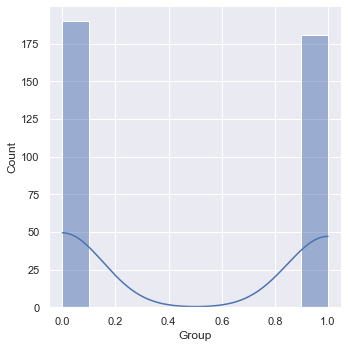

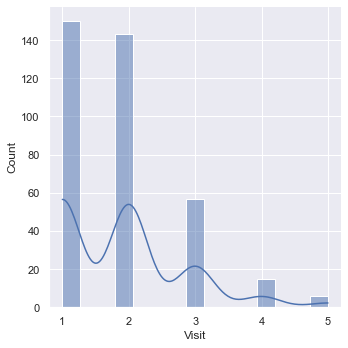

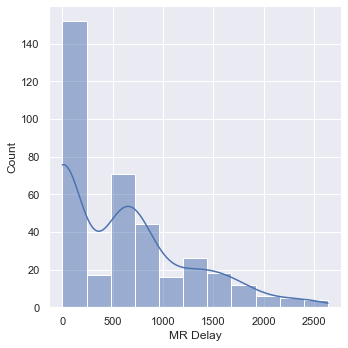

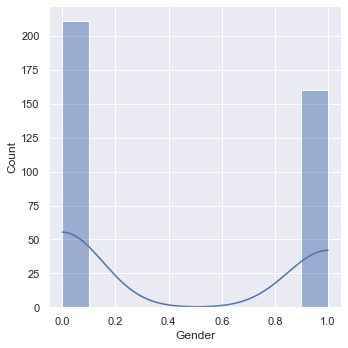

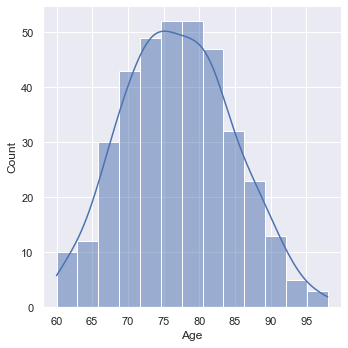

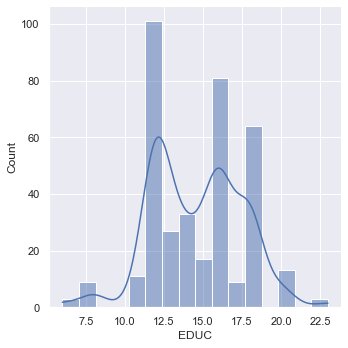

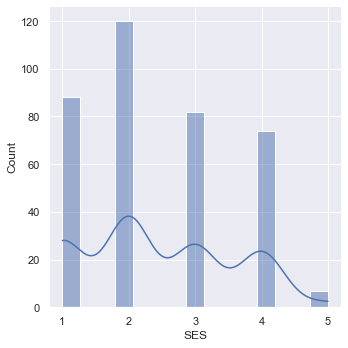

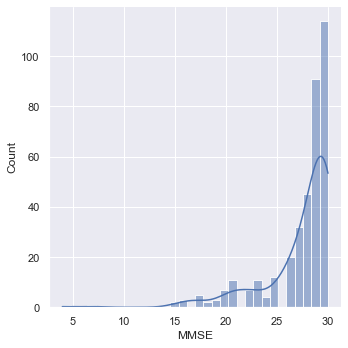

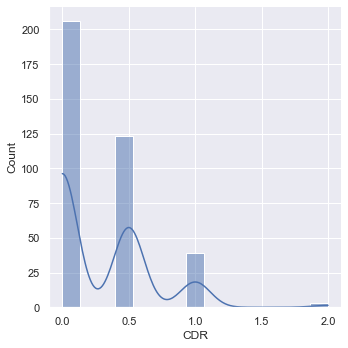

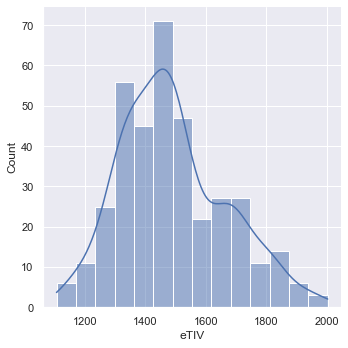

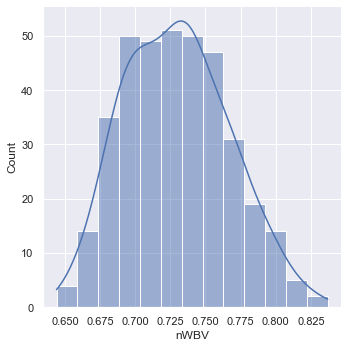

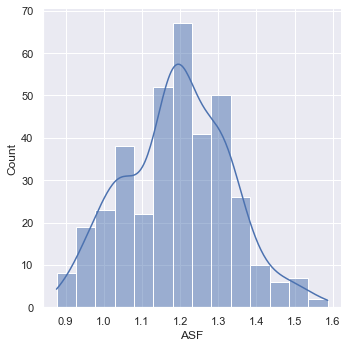

In [12]:
for name in data_long.columns:
    sns.displot(data_long[name], kde=True)

**The Interpretation**

**Group** - This is shows a categorical variable with two categories hence why the density estimation plot curved downward.

**Visit** - This shows a categorical variable with five categories and the number of subjects reduce for each visit number.

**MR Delay** - This shows a time delay was not experienced for all 150 test subjects on their first scans, but with subsequent scans a time delayed scan was carried out.

**Gender** - This is shows a categorical variable with two categories which caused a downward curve in the density estimation

**AGE** - This portrays a normal distribution with a bell shape density estimation, that peaks around the mean goes close to 0 around the edges, and has steep slopes

**EDUC** - This shows two different peaks with one being higher, otherwise a normal distribution with steep slopes.

**SES** - This shows a categorical data with 5 categories with a mode of 2 and mean just around 2.

**MMSE** - This shows a left skewed distribution, with its values concentrated on the right side of the graph. 

**CDR** - This shows a somewhat right skewed distribution of a categorical data with 4 categories

**eTIV** - This shows a normal distribution with little to no skewness on either side. 

**nWBV** - This shows a normal distribution with little to no skewness on either side, a mean of 0.729526 and standard deviation of 0.037229, its values are distributed almost evenly around the mean, and having a similar mode and mean

**ASF** - This shows a normal distribution with little to no skewness on either side, a mean of 1.193776 and standard deviation of 0.136533, it has a steeper slope on the right side as compared to the left side showing a steady increase in values and slow increase after the mean value  

#### 2.2.1. Boxplot and handling of outliers


<AxesSubplot:ylabel='Group'>

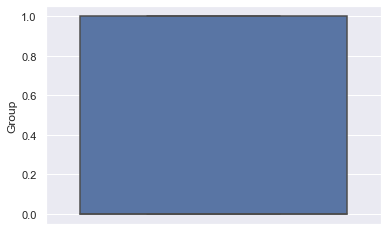

In [13]:
sns.boxplot(y=data_long.Group)

<AxesSubplot:ylabel='Visit'>

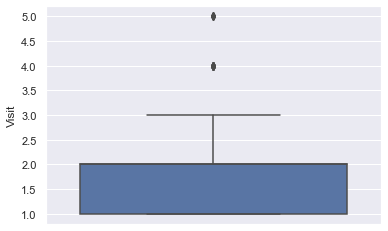

In [14]:
sns.boxplot(y=data_long.Visit)

<AxesSubplot:ylabel='MR Delay'>

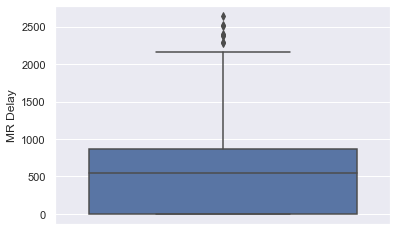

In [15]:
sns.boxplot(y=data_long['MR Delay'])

<AxesSubplot:ylabel='Gender'>

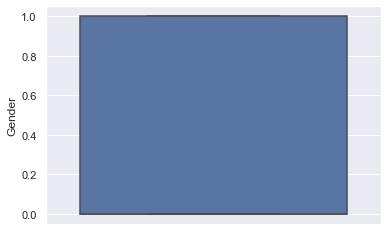

In [16]:
sns.boxplot(y=data_long.Gender)

<AxesSubplot:ylabel='Age'>

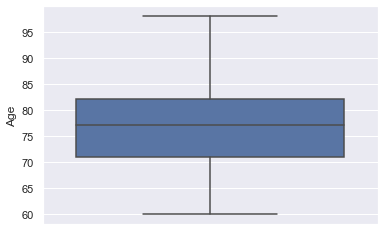

In [17]:
sns.boxplot(y=data_long.Age)

<AxesSubplot:ylabel='EDUC'>

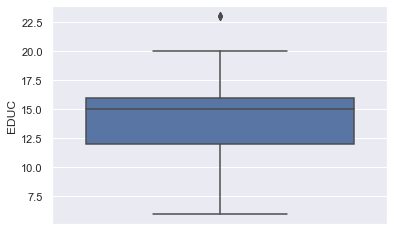

In [18]:
sns.boxplot(y=data_long.EDUC)

<AxesSubplot:ylabel='SES'>

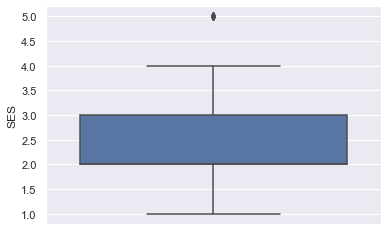

In [19]:
sns.boxplot(y=data_long.SES)

<AxesSubplot:ylabel='MMSE'>

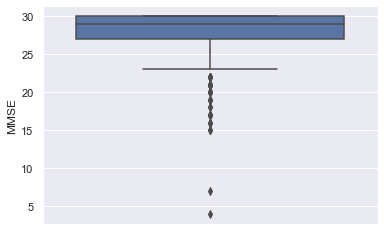

In [20]:
sns.boxplot(y=data_long.MMSE)

<AxesSubplot:ylabel='CDR'>

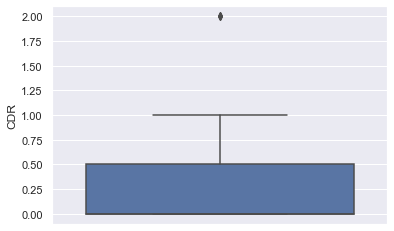

In [21]:
sns.boxplot(y=data_long.CDR)

<AxesSubplot:ylabel='eTIV'>

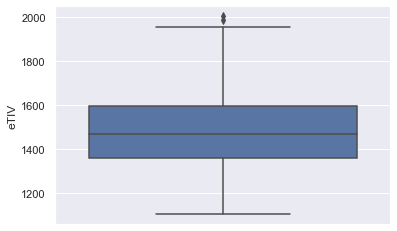

In [22]:
sns.boxplot(y=data_long.eTIV)

<AxesSubplot:ylabel='nWBV'>

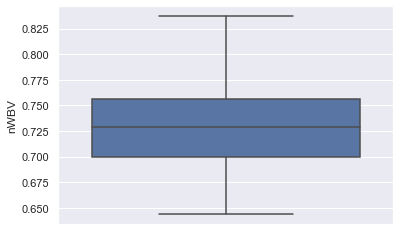

In [23]:
sns.boxplot(y=data_long.nWBV)

<AxesSubplot:ylabel='ASF'>

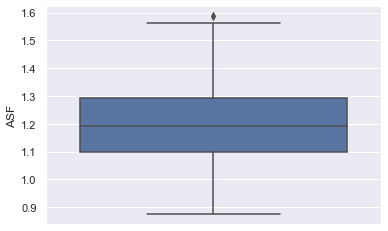

In [24]:
sns.boxplot(y=data_long.ASF)

There are outliers, however, they  have to stay because  they provide some context for the dataset.

### 2.3. Looking at relations between variables (bivariate data analysis)

#### 2.3.1 Heatmaps


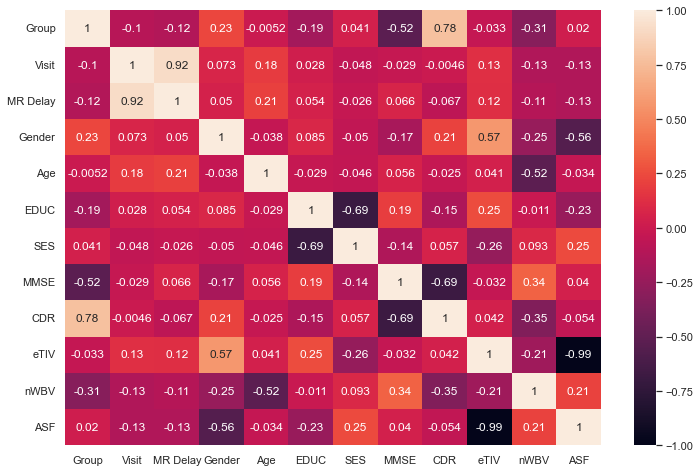

In [25]:
corr = data_long.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, vmin=-1)
plt.show()

#### 2.3.2 Scatterplots

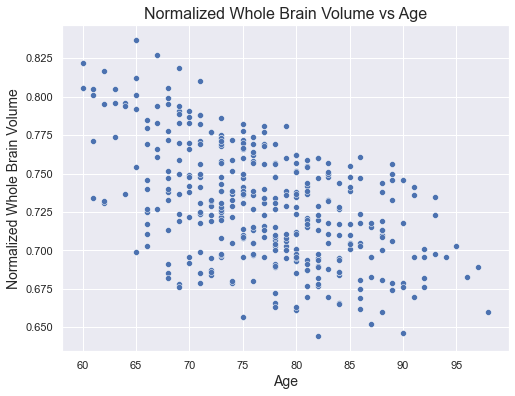

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='nWBV', data=data_long)
plt.title('Normalized Whole Brain Volume vs Age', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Normalized Whole Brain Volume', size=14)
plt.show()

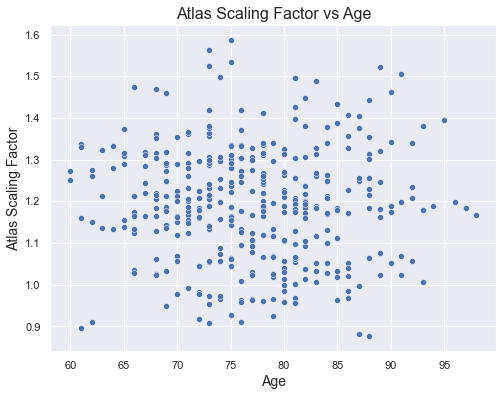

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='ASF', data=data_long)
plt.title('Atlas Scaling Factor vs Age', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Atlas Scaling Factor', size=14)
plt.show()

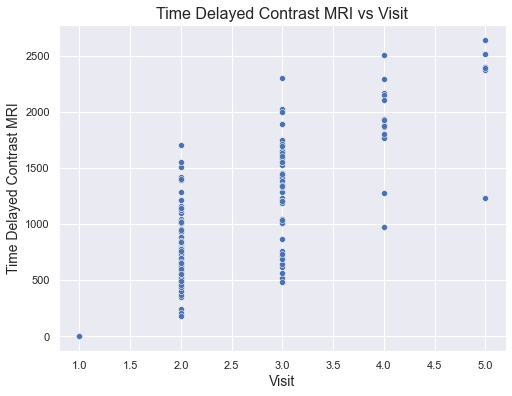

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Visit', y='MR Delay', data=data_long)
plt.title('Time Delayed Contrast MRI vs Visit', size=16)
plt.xlabel('Visit', size=14)
plt.ylabel('Time Delayed Contrast MRI', size=14)
plt.show()

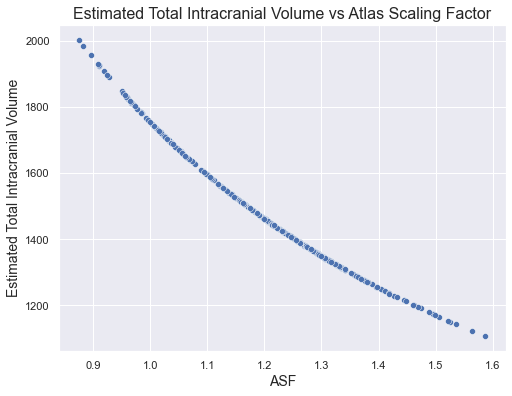

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='ASF', y='eTIV', data=data_long)
plt.title('Estimated Total Intracranial Volume vs Atlas Scaling Factor', size=16)
plt.xlabel('ASF', size=14)
plt.ylabel('Estimated Total Intracranial Volume', size=14)
plt.show()

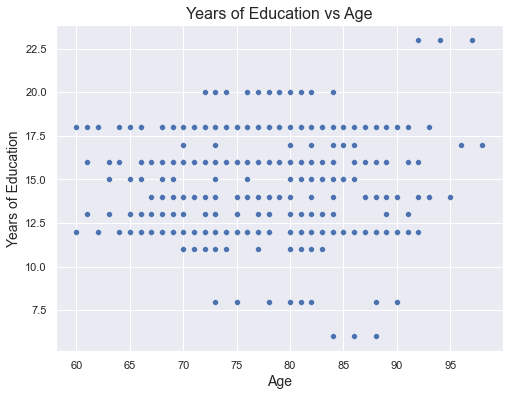

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='EDUC', data=data_long)
plt.title('Years of Education vs Age', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Years of Education', size=14)
plt.show()

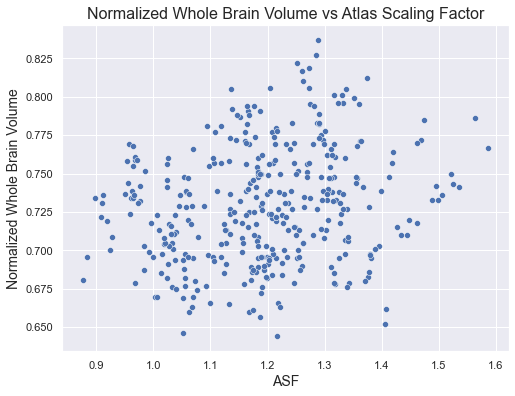

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='ASF', y='nWBV', data=data_long)
plt.title('Normalized Whole Brain Volume vs Atlas Scaling Factor', size=16)
plt.xlabel('ASF', size=14)
plt.ylabel('Normalized Whole Brain Volume', size=14)
plt.show()

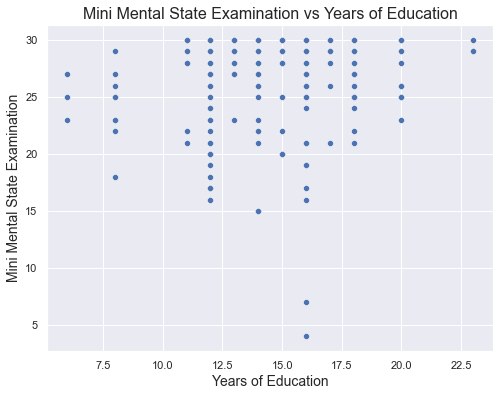

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='EDUC', y='MMSE', data=data_long)
plt.title('Mini Mental State Examination vs Years of Education', size=16)
plt.xlabel('Years of Education', size=14)
plt.ylabel('Mini Mental State Examination', size=14)
plt.show()

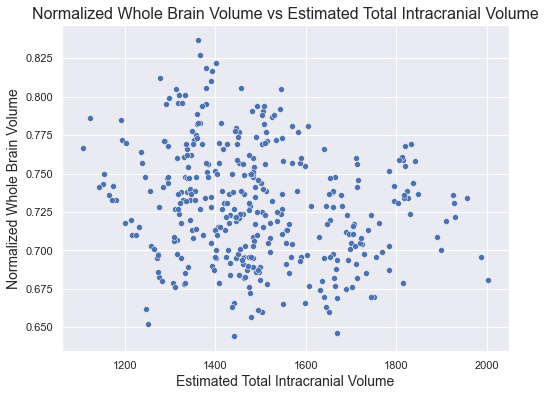

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='eTIV', y='nWBV', data=data_long)
plt.title('Normalized Whole Brain Volume vs Estimated Total Intracranial Volume', size=16)
plt.xlabel('Estimated Total Intracranial Volume', size=14)
plt.ylabel('Normalized Whole Brain Volume', size=14)
plt.show()

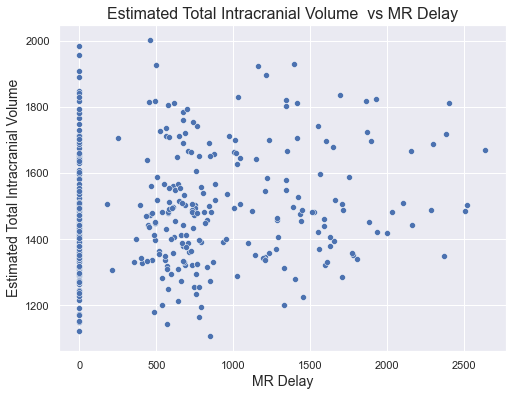

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='MR Delay', y='eTIV', data=data_long)
plt.title('Estimated Total Intracranial Volume  vs MR Delay', size=16)
plt.xlabel('MR Delay', size=14)
plt.ylabel('Estimated Total Intracranial Volume', size=14)
plt.show()

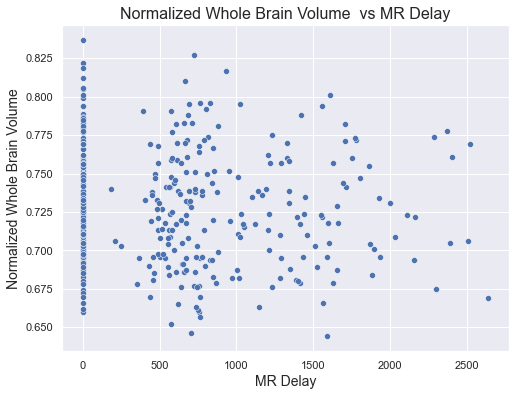

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='MR Delay', y='nWBV', data=data_long)
plt.title('Normalized Whole Brain Volume  vs MR Delay', size=16)
plt.xlabel('MR Delay', size=14)
plt.ylabel('Normalized Whole Brain Volume', size=14)
plt.show()

#### 2.3.3 Joint distribution plots with regression fit

In [36]:
data_long_new_index = data_long.reset_index(drop=True)
# data_long_new_index.head()

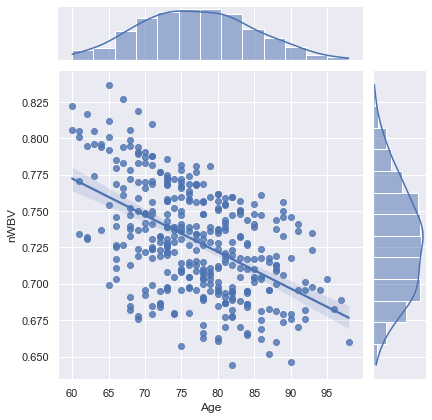

In [37]:
sns.jointplot(data=data_long_new_index, x='Age', y='nWBV', kind='reg')

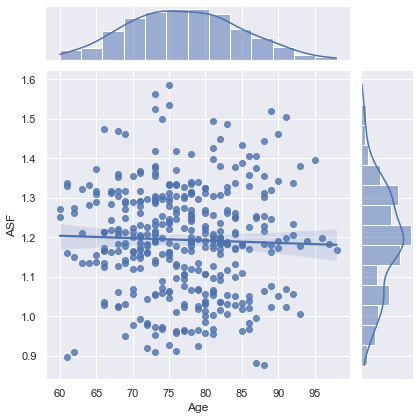

In [38]:
sns.jointplot(data=data_long_new_index, x='Age', y='ASF', kind='reg')

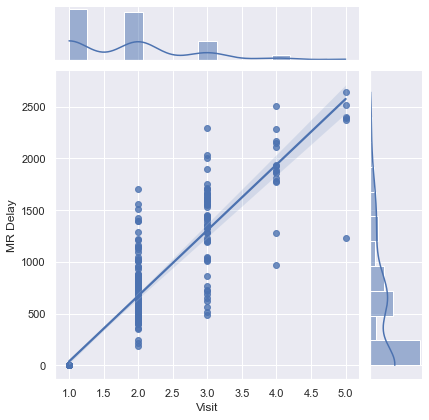

In [39]:
sns.jointplot(data=data_long_new_index, x='Visit', y='MR Delay', kind='reg')

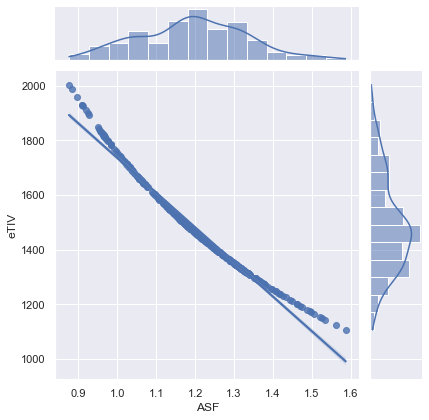

In [40]:
sns.jointplot(data=data_long_new_index, x='ASF', y='eTIV', kind='reg')

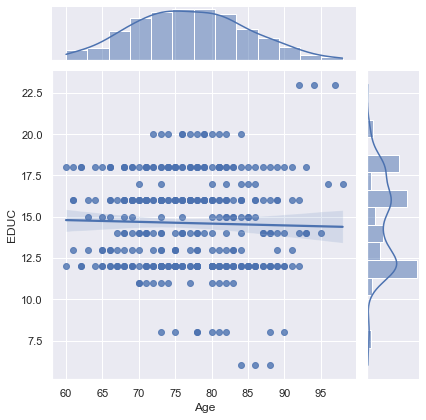

In [41]:
sns.jointplot(data=data_long_new_index, x='Age', y='EDUC', kind='reg')

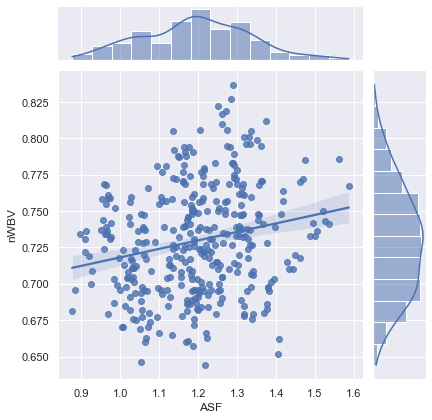

In [42]:
sns.jointplot(data=data_long_new_index, x='ASF', y='nWBV', kind='reg')

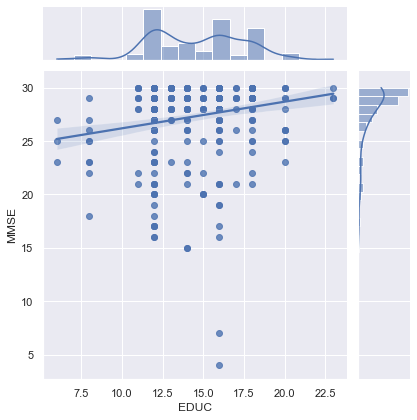

In [43]:
sns.jointplot(data=data_long_new_index, x='EDUC', y='MMSE', kind='reg')

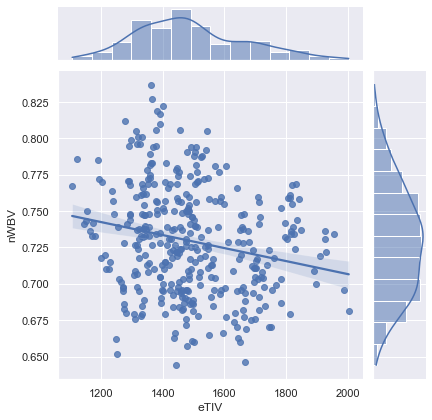

In [44]:
sns.jointplot(data=data_long_new_index, x='eTIV', y='nWBV', kind='reg')

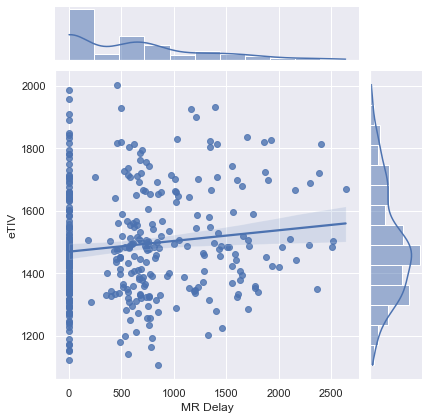

In [45]:
sns.jointplot(data=data_long_new_index, x='MR Delay', y='eTIV', kind='reg')

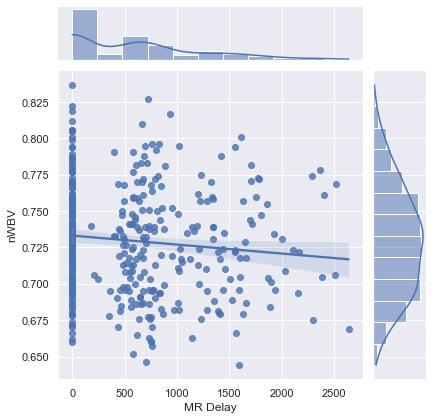

In [46]:
sns.jointplot(data=data_long_new_index, x='MR Delay', y='nWBV', kind='reg')

The values used for the scatterplots and jointplots were chosen because of their correlation values, I want to check to confirm how the correlation coefficients look in a graph and to confirm if it does translate to actual meaningful insights.

#### 2.3.4 Plotting category dependencies

plot multiple plots using each categorical data as hue for each plot to check their relationships

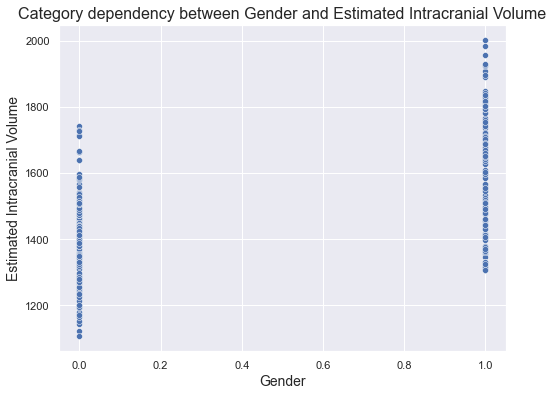

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Gender', y='eTIV', data=data_long)
plt.title('Category dependency between Gender and Estimated Intracranial Volume', size=16)
plt.xlabel('Gender', size=14)
plt.ylabel('Estimated Intracranial Volume', size=14)
plt.show()

<Figure size 576x432 with 0 Axes>

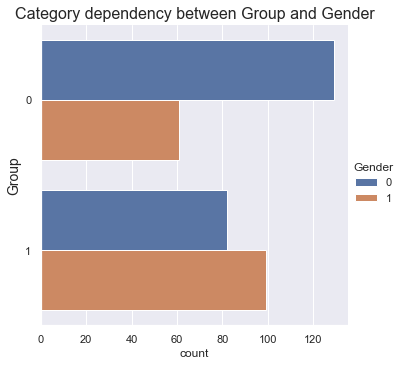

In [48]:
plt.figure(figsize=(8,6))
sns.catplot(y="Group", hue='Gender', kind="count", data=data_long)
plt.title('Category dependency between Group and Gender', size=16)
plt.ylabel('Group', size=14)
plt.show()

<Figure size 576x432 with 0 Axes>

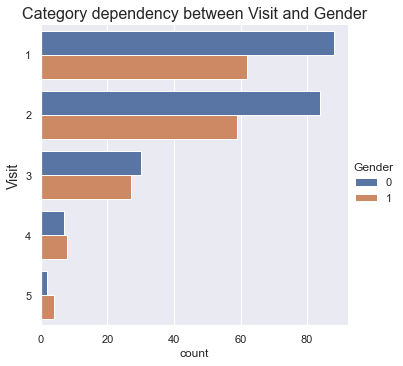

In [49]:
plt.figure(figsize=(8,6))
sns.catplot(y="Visit", hue="Gender", kind="count", data=data_long)
plt.title('Category dependency between Visit and Gender', size=16)
plt.ylabel('Visit', size=14)
plt.show()

<Figure size 576x432 with 0 Axes>

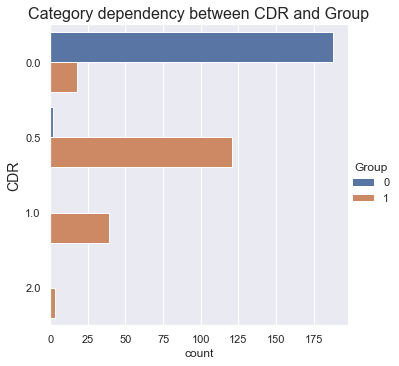

In [50]:
plt.figure(figsize=(8,6))
sns.catplot(y="CDR", hue="Group", kind="count", data=data_long)
plt.title('Category dependency between CDR and Group', size=16)
plt.ylabel('CDR', size=14)
plt.show()

<Figure size 576x432 with 0 Axes>

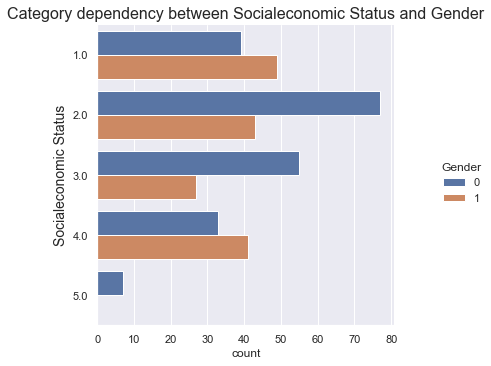

In [51]:
plt.figure(figsize=(8,6))
sns.catplot(y="SES", hue="Gender", kind="count", data=data_long)
plt.title('Category dependency between Socialeconomic Status and Gender', size=16)
plt.ylabel('Socialeconomic Status', size=14)
plt.show()

### 2.4 Statistically relevant differences, t-test

## 3. Clustering

I do suspect some natural clusters from looking at the scatter plots.
From the nWBV vs Age plot, i noticed some natural clusters will form with high nWBV values and low age values, this forms a trend as well as the age increases and the nWBV decreases.
From the ASF and Age plot, on the y-axis ASF will cluster naturally with age depending on it's position on the graph.
From the nWBV vs ASF plot, i suspect natural clusters might form in the upper right corner, the lower left corner and in the middle, some might also form in the bottom right and the top part of the plot depending on the number of clusters we might expect
From nWBV vs eTIV plot, we can see clusters possibly forming naturally in the upper left corner, the middle right, bottom left and the middle parts of the graph.

### 3.1 Identifying the number of clusters

In [52]:
# select the data  needed for  clustering analysis, and also dropping the Group data
# dlc = data_long.iloc[:, 0:].values

In [53]:
# To check for the Within Cluster Sum of Squares or WCSS values which is necessary for carrying out the Elbow method
# We can create a for loop for a range of K-Means clusters and collecting the WCSS into a list

WCSS = []
K = range(1,15) # possible number of clusters

for k in K:
    kmeanModel = KMeans(n_clusters=k, init= 'k-means++', random_state=42)
    kmeanModel.fit(data_long)
    WCSS.append(kmeanModel.inertia_)

C:\Users\HI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


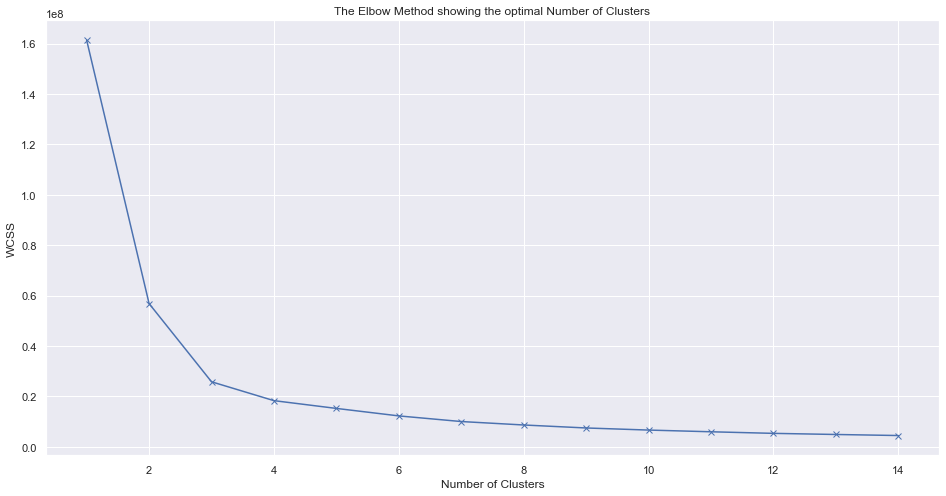

In [54]:
plt.figure(figsize=(16,8))
plt.plot(K, WCSS, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal Number of Clusters')
plt.show()

From the above plot, we can see that the suitable number of clusters for this dataset is 3

### 3.2 Clustering with k-means method

In [55]:
kmeanModel = KMeans(n_clusters=3, init= 'k-means++', random_state=42)
kmeanModel.fit(data_long)

KMeans(n_clusters=3, random_state=42)

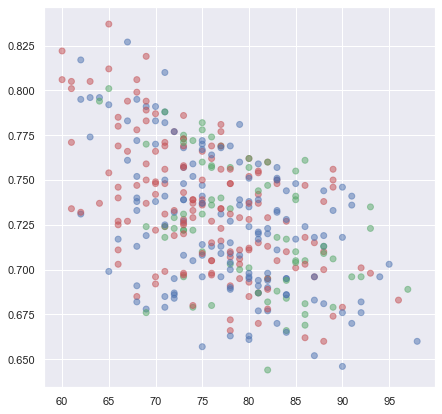

In [56]:
dlc_clustered = kmeanModel.fit_predict(data_long)


# Define our own color map
COLOR_LABEL_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [COLOR_LABEL_MAP[l] for l in dlc_clustered]

# Plot the scatter digram

plt.figure(figsize=(7,7))
plt.scatter(x='Age', y='nWBV', data=data_long, c= label_color, alpha=0.5) 
plt.show()

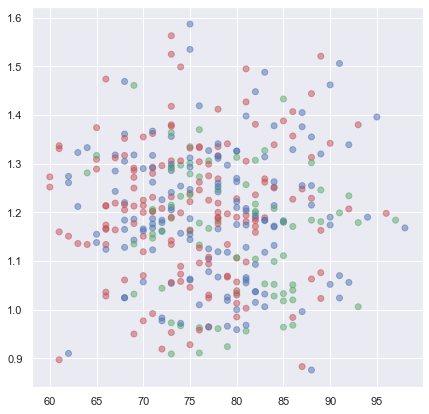

In [57]:
plt.figure(figsize = (7,7))
plt.scatter(x='Age', y='ASF', data=data_long, c= label_color, alpha=0.5)
plt.show()

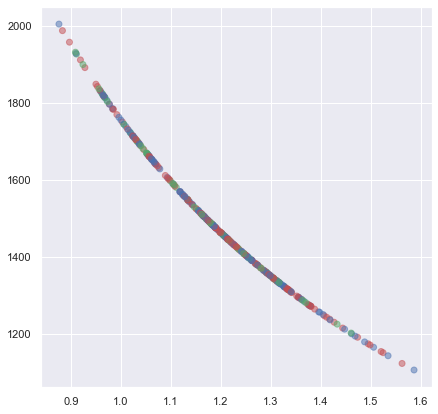

In [58]:
plt.figure(figsize = (7,7))
plt.scatter(x='ASF', y='eTIV', data=data_long, c= label_color, alpha=0.5)
plt.show()

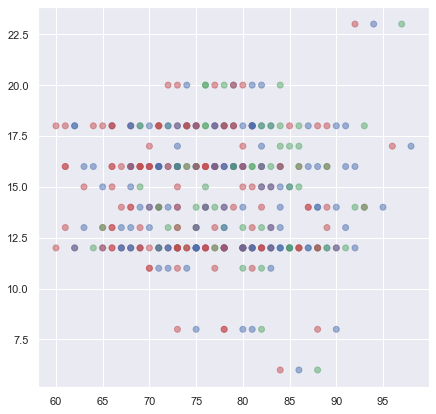

In [59]:
plt.figure(figsize = (7,7))
plt.scatter(x='Age', y='EDUC', data=data_long, c= label_color, alpha=0.5)
plt.show()

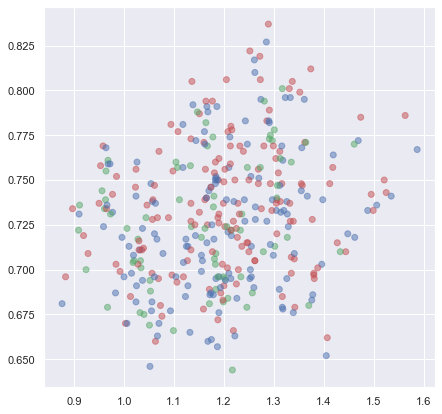

In [60]:
plt.figure(figsize = (7,7))
plt.scatter(x='ASF', y='nWBV', data=data_long, c= label_color, alpha=0.5)
plt.show()

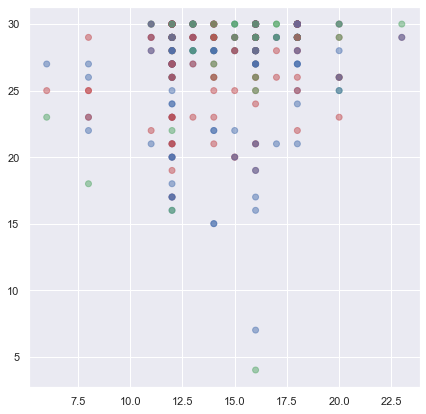

In [61]:
plt.figure(figsize = (7,7))
plt.scatter(x='EDUC', y='MMSE', data=data_long, c= label_color, alpha=0.5)
plt.show()

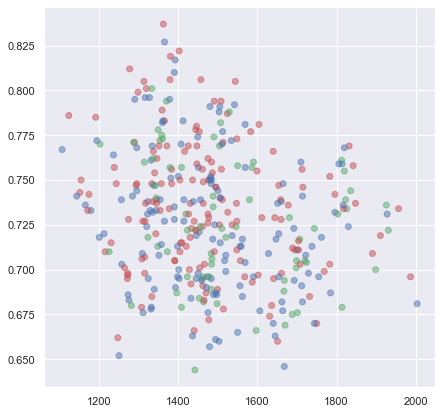

In [62]:
plt.figure(figsize = (7,7))
plt.scatter(x='eTIV', y='nWBV', data=data_long, c= label_color, alpha=0.5)
plt.show()

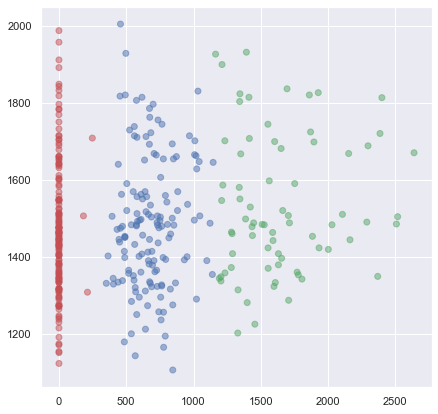

In [63]:
plt.figure(figsize = (7,7))
plt.scatter(x='MR Delay', y='eTIV', data=data_long, c= label_color, alpha=0.5)
plt.show()

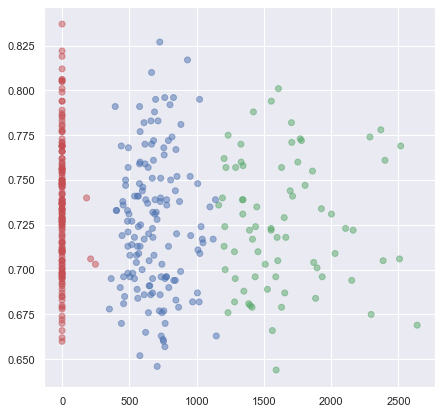

In [64]:
plt.figure(figsize = (7,7))
plt.scatter(x='MR Delay', y='nWBV', data=data_long, c= label_color, alpha=0.5)
plt.show()

## 4. Dimensionality reduction

### 4.1 Scatterplot of reduced dimensions

In [66]:
# from sklearn.preprocessing import StandardScaler
# In order to use PCA, we have to normalize our data to ensure we do not have some data points 
# being weighted higher than others because of their high values such as age and 

# x = data_long.iloc[:, 0:].values
x = StandardScaler().fit_transform(data_long) # normalizing the data

In [67]:
x.shape

(371, 12)

In [68]:
np.mean(x),np.std(x)

(1.0613452814026654e-16, 1.0)

In [69]:
# feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [70]:
# normalised_data_long = pd.DataFrame(x,columns=feat_cols)

In [71]:
# normalised_data_long.tail()

In [72]:
pca_data_long = PCA()
pca_data_long.fit(x)

PCA()

In [73]:
pca_data_long.explained_variance_ratio_

array([0.24623245, 0.22114229, 0.16164485, 0.11503471, 0.09928547,
       0.0460426 , 0.03934529, 0.0263634 , 0.02368137, 0.01451603,
       0.00584503, 0.00086651])

Text(0, 0.5, 'Cumulative Explained Variance')

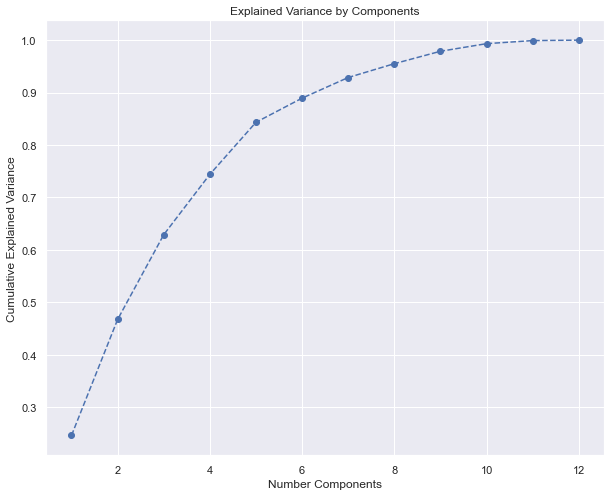

In [74]:
plt.figure(figsize = (10,8))
plt.plot(range(1,13), pca_data_long.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number Components')
plt.ylabel('Cumulative Explained Variance')

The above graph shows the cumulative amount of variance that is captured (on the y-axis) depending on the number of components included (the x-axis). Preserving around 80% of the variance is  considered to be a rule of thumb. By this, i decide to keep 5 components as this preserves around 80% of the variance

In [75]:
# from sklearn.decomposition import PCA which is imported in the Libraries section
pca_long = PCA(n_components=5) # as required by the question
pca_long.fit(x)

PCA(n_components=5)

In [76]:
pca_long.transform(x)

array([[ 2.55991558, -1.54556181, -1.6808598 , -0.77185479, -2.62636969],
       [ 2.89755962, -2.22958082, -0.57748423, -0.79663928, -2.52135462],
       [ 1.65600032,  1.26386059, -1.6786101 , -0.85446334, -0.22188999],
       ...,
       [-3.11150337, -0.37267421, -1.54367864, -0.73843051,  1.21648596],
       [-2.59704153, -0.85253961, -0.12648782, -0.82655731,  1.63855723],
       [-2.1655841 , -1.39494036,  1.32388829, -1.00868065,  2.204838  ]])

In [77]:
data_long_pca_scores = pca_long.transform(x)

In [78]:
# principal_datalong_Df = pd.DataFrame(data = principalComponents_datalong
#              , columns = ['principal component 1', 'principal component 2'])

In [79]:
# principal_datalong_Df.shape

In [80]:
print('Explained variation per principal component: {}'.format(pca_long.explained_variance_ratio_))

Explained variation per principal component: [0.24623245 0.22114229 0.16164485 0.11503471 0.09928547]


In [81]:
# pca = principal_datalong_Df.iloc[:, 0:].values

In [82]:
# We can create a for loop for a range of K-Means clusters and collecting the distortions into a list

WCSS = []
K = range(1,10)

for k in K:
    pca_kmeanModel = KMeans(n_clusters=k, init= 'k-means++', random_state=42)
    pca_kmeanModel.fit(data_long_pca_scores)
    WCSS.append(pca_kmeanModel.inertia_)

C:\Users\HI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


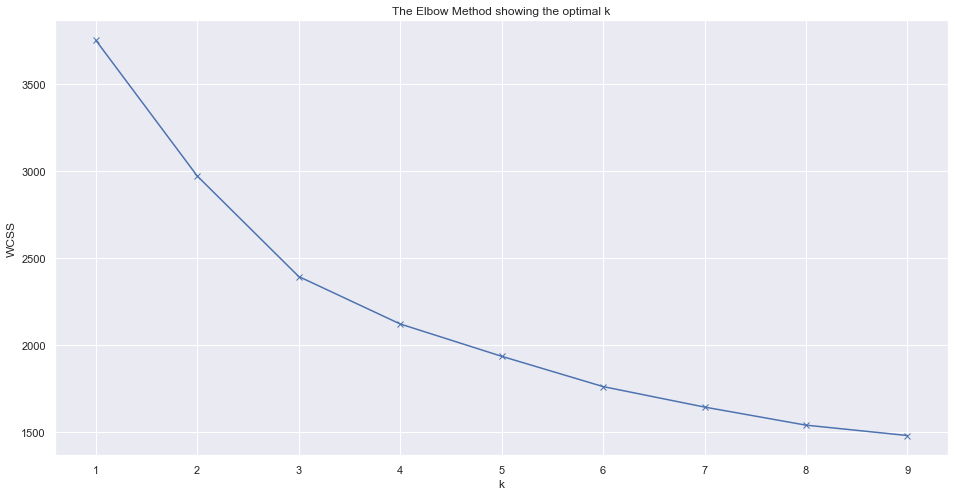

In [83]:
plt.figure(figsize=(16,8))
plt.plot(K, WCSS, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [84]:
pca_kmeanModel = KMeans(n_clusters=3, init= 'k-means++', random_state=42)
pca_kmeanModel.fit(data_long_pca_scores)

KMeans(n_clusters=3, random_state=42)

In [85]:
#  create a new data frame with the original features and add the PCA scores and assigned clusters,
data_long_pca_kmeans = pd.concat([data_long.reset_index(drop = True), pd.DataFrame(data_long_pca_scores)], axis = 1)
data_long_pca_kmeans.columns.values[-5:] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5']

# The Last column i added contains the pca k-means clustering Label points
data_long_pca_kmeans[('Cluster Points')] = pca_kmeanModel.labels_


In [86]:
# data_long_pca_kmeans.head(10)

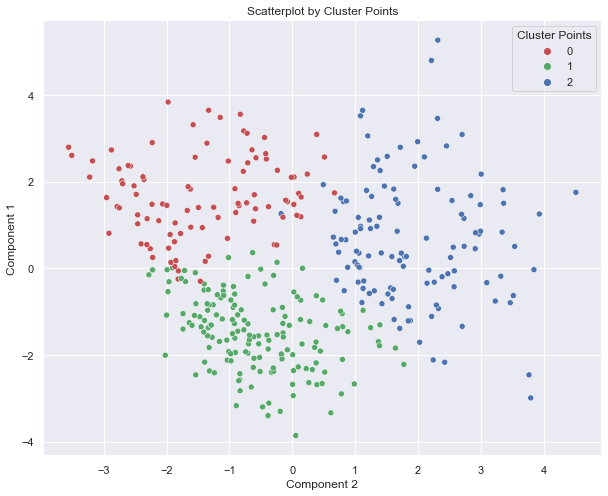

In [87]:
# PLot data by PCA components. The Y axis is the first component, X axis is the second,

plt.figure(figsize = (10, 8))
sns.scatterplot(x ='Component 2', y = 'Component 1', hue = 'Cluster Points', palette = ['r', 'g', 'b'], data=data_long_pca_kmeans)
plt.title('Scatterplot by Cluster Points')
plt.show()

### 4.2 Labeling data points belonging to clusters

In [88]:
data_long_pca_kmeans['Cluster Group'] = data_long_pca_kmeans['Cluster Points'].map({0:'first', 
                                                                                     1:'second', 
                                                                                     2:'third'})

In [89]:
data_long_pca_kmeans.head()

,Group,Visit,MR Delay,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Component 1,Component 2,Component 3,Component 4,Component 5,Cluster Points,Cluster Group
0,0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883,2.559916,-1.545562,-1.680860,-0.771855,-2.626370,0,first
1,0,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876,2.897560,-2.229581,-0.577484,-0.796639,-2.521355,0,first
2,1,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046,1.656000,1.263861,-1.678610,-0.854463,-0.221890,2,third
3,1,2,560,1,76,12,2.0,28.0,0.5,1738,0.713,1.010,2.171199,0.238999,-0.551268,-0.945315,-0.316313,0,first
4,1,3,1895,1,80,12,2.0,22.0,0.5,1698,0.701,1.034,3.085663,0.388828,1.664641,-0.807166,0.482729,0,first


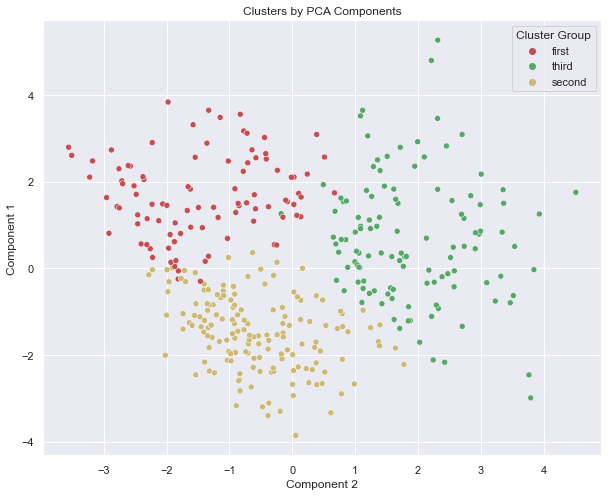

In [91]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x ='Component 2', y = 'Component 1', hue = 'Cluster Group', palette = ['r', 'g', 'y'], data=data_long_pca_kmeans)
plt.title('Clusters by PCA Components')
plt.show()

When compared to the plots done when using kmeans clustering method only we could see that  the use of PCA before computing kmeans cluster analysis creates a better visual representation of the clusters, in which each cluster can be distinguished properly and thereby almost completely separating the entire dataset. This is one of the major goals when using PCA that is to reduce the number of variable and noise by creating bigger and more meaningful features from the already existing features of the dataset.

There are some overlap between the first and second cluster group as well as the first and third cluster group, but overall all 3 cluster groups can be easily spotted. The areas where this overlapping is found are determined by the addition of a third or possibly a fourth component which is unavailble on the above graph.